# Notebook Imports and Packages

In [369]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 


%matplotlib inline

# Example 1 - Markdown Equations
## A simple cost function
## $$f(x) = x^2 + x + 1$$

In [4]:
def f(x): 
    return x**2 + x + 1

In [5]:
# Make Data
# linspace returns evenly spaced numbers over a specified interval
x_1 = np.linspace(start=-3, stop=3, num=100)
# x_1

<function matplotlib.pyplot.show(close=None, block=None)>

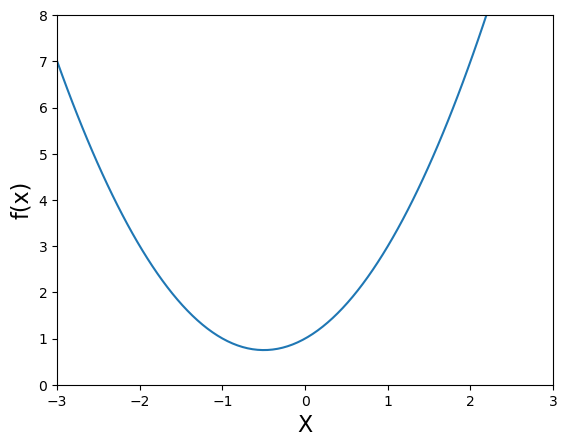

In [6]:
# Plot
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1))
plt.show

## Slope & Derivatives
Challenge: Create a python function for the derivative of f(x) called df(x)

In [8]:
def df(x):
    return 2*x + 1

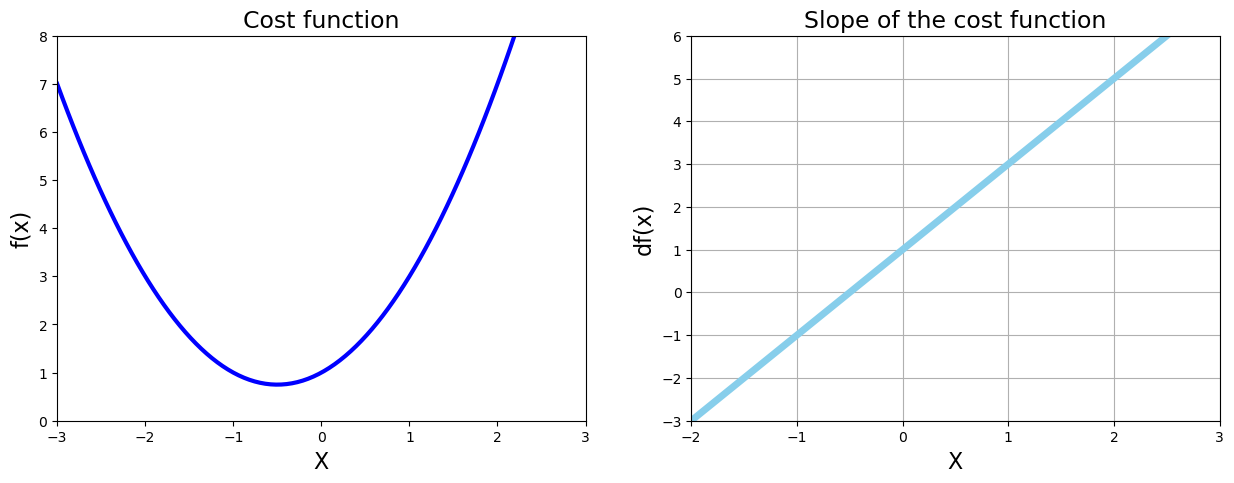

In [9]:
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1) #1 row, 2 columns, index 1
plt.xlim(-3,3)
plt.ylim(0,8)

plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.title('Cost function', fontsize=17)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2) #1 row, 2 columns, index 2
plt.xlim(-2,3)
plt.ylim(-3,6)

plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.title('Slope of the cost function', fontsize=17)
plt.grid()

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Python Loops & Gradient Descent

In [11]:
# Python For Loop
for n in range(5):
    print('Hello World', n)
print('End of Loop')

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of Loop


In [12]:
# Python While Loop
counter = 0
while counter < 5:
    print('Counting ...', counter)
    counter = counter + 1
print('Ready or not, here I come!')

Counting ... 0
Counting ... 1
Counting ... 2
Counting ... 3
Counting ... 4
Ready or not, here I come!


In [13]:
# Gradient Descent 
new_x = 3 # Starting point
previous_x = 0 # Temporary value
step_multiplier = 0.1 # Learning rate
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x # This is a prediction
    gradient = df(previous_x) # Calculates the error
    new_x = previous_x - step_multiplier * gradient # This is the learning step
    #Continues until the minimum of convex is reached

    step_size = abs(new_x - previous_x)
    #print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope of df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))


Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope of df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


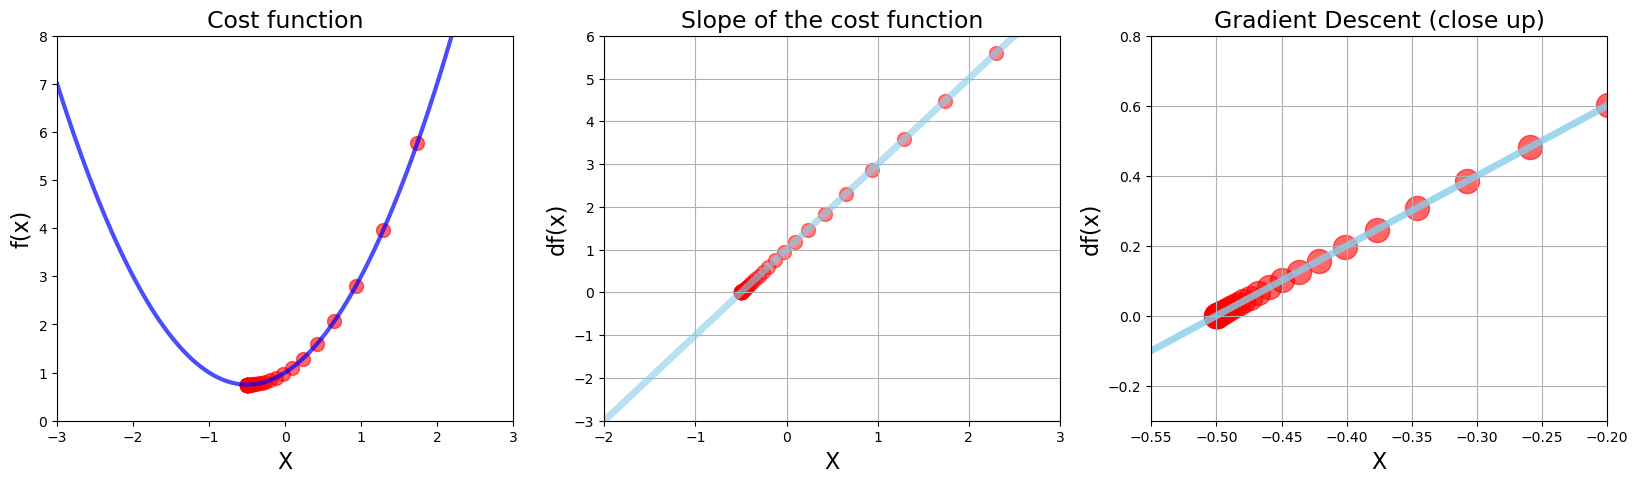

In [14]:
# Superimpose the gradient descent calculations on plot 
# Visualizes how the algortihm works

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1) #1 row, 2 columns, index 1

plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.title('Cost function', fontsize=17)
plt.xlim(-3,3)
plt.ylim(0,8)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.7)

# Algorithm visualization
# changes data type from list to array
# these lines were added
values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2) #1 row, 2 columns, index 2

plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.title('Slope of the cost function', fontsize=17)
plt.grid()
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)

# Algorithm visualization
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative(Close up)
plt.subplot(1, 3, 3) #1 row, 2 columns, index 2


plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.title('Gradient Descent (close up)', fontsize=17)
plt.grid()
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.8)

# Algorithm visualization
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

plt.show()

# Example 2- Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^ 4 - 4x^2 + 5$$

In [16]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

Challenge: write the g(x) function and the dg(x) function in Python

In [18]:
def g(x): 
    return x**4 - 4*x**2 + 5

# Derivative of g(x) using power rule
def dg(x):
    return 4*x**3 - 8*x

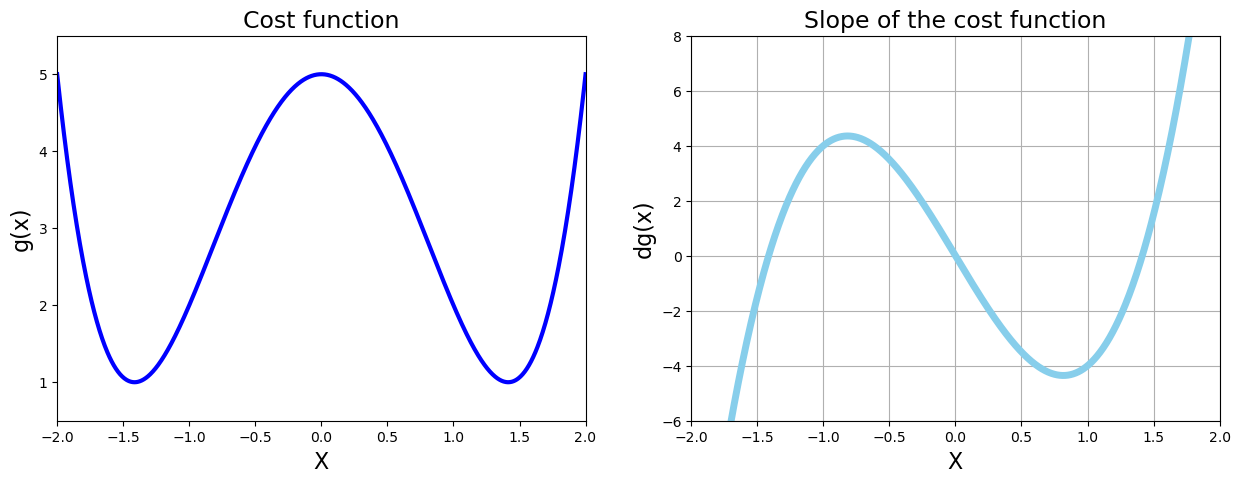

In [19]:
# Plot the cost function
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1) #1 row, 2 columns, index 1
plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.title('Cost function', fontsize=17)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2) #1 row, 2 columns, index 2
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.title('Slope of the cost function', fontsize=17)
plt.grid()

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent as a Python Function

In [21]:
# Gradient Descent
## Will take 4 arguments: 
    #Derivative Function-REQUIRED
    #Initial Guess or Starting point-REQUIRED
    #Learning Rate or Multiplier-OPTIONAL
    #Precision-OPTIONAL
    
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess # Starting point
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x # This is a prediction
        gradient = derivative_func(previous_x) # Calculates the error
        new_x = previous_x - multiplier * gradient # This is the learning step
        #Continues until the minimum of convex is reached

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break

    return new_x, x_list, slope_list

In [22]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg,
                                                 initial_guess=-0.5,
                                                 multiplier=0.01,
                                                 precision=0.0001) #dg is ag is a pointer to the dg() function
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [23]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg,
                                                 initial_guess=-0.1) #dg is ag is a pointer to the dg() function
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


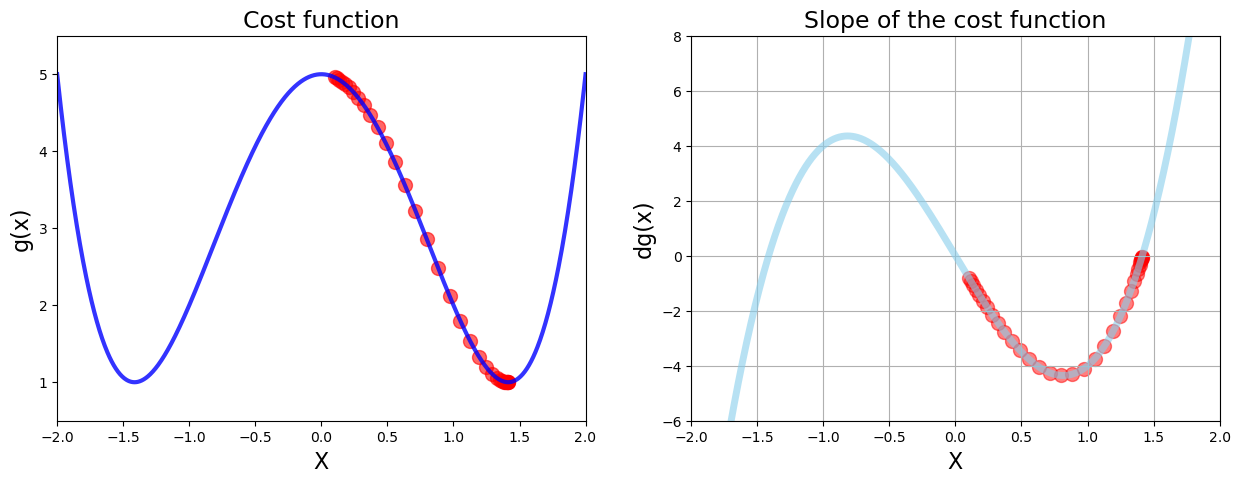

In [24]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg,
                                                 initial_guess=0.1)

# Superimpose the gradient descent calculations on plot 
# Visualizes how the algortihm works

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1) #1 row, 2 columns, index 1
plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.title('Cost function', fontsize=17)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
#Adds scatter plot of gradiant descent algorithm results
#Must convert list to array before plugging into a function
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)


# 2 Chart: Derivative
plt.subplot(1, 2, 2) #1 row, 2 columns, index 2
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.title('Slope of the cost function', fontsize=17)
plt.grid()

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
#Adds scatter plot of gradiant descent algorithm results
#Must convert list to array before plugging into a function
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)
plt.show()

# Example 3- Divergence, Overflow and Python Tuples
$$h(x) = x^5 - 2x^4 + 2$$

In [26]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

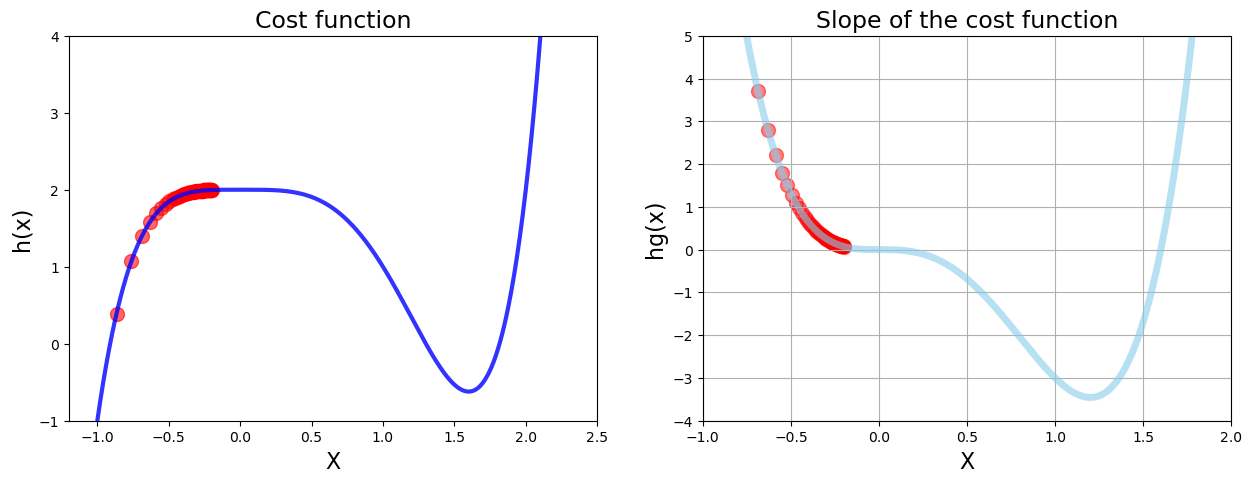

Local min occurs at:  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of steps: 72


In [27]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh,
                                                 initial_guess=-0.2, 
                                                 max_iter=71)

# Superimpose the gradient descent calculations on plot 
# Visualizes how the algortihm works

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1) #1 row, 2 columns, index 1
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)

plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.title('Cost function', fontsize=17)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
#Adds scatter plot of gradiant descent algorithm results
#Must convert list to array before plugging into a function
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)


# 2 Chart: Derivative
plt.subplot(1, 2, 2) #1 row, 2 columns, index 2
plt.xlim(-1,2)
plt.ylim(-4,5)

plt.xlabel('X', fontsize=16)
plt.ylabel('hg(x)', fontsize=16)
plt.title('Slope of the cost function', fontsize=17)
plt.grid()

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
#Adds scatter plot of gradiant descent algorithm results
#Must convert list to array before plugging into a function
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)
plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps:', len(list_x))

In [28]:
import sys
# help(sys)
# sys.version
# type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [30]:
# Creating a tuple - tuple packing
breakfast = 'bacon', 'egg', 'avocado'
unlucky_numbers = 13, 4, 26, 17

# How to access a value in a tuple
print('I love ', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')

# Tuples are immutable
not_my_address = 1, 'Infinite_loop', 'Cupertino', 95014

tuple_with_single_value = 42,

#sequence unpacking
main, side, greens = breakfast
print('Main course is ', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Nunber of steps is', len(data_tuple[1]))

I love  bacon
My hotel has no 4th floor
Main course is  bacon
Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Nunber of steps is 117


# The Learning Rate

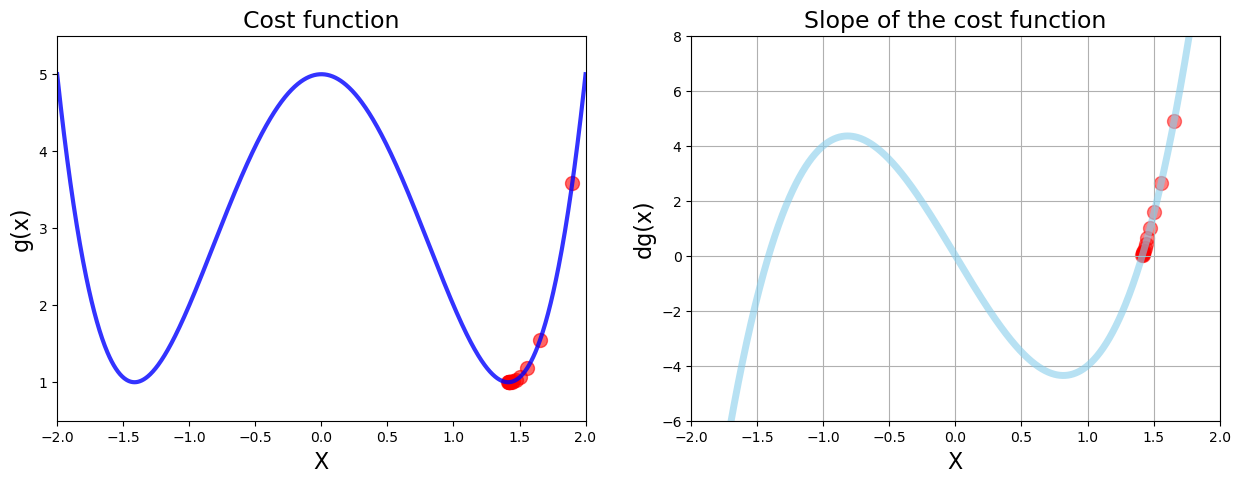

Number of steps is: 14


In [32]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg,
                                                 initial_guess=1.9,
                                                 multiplier=0.02,
                                                max_iter=500)

# Superimpose the gradient descent calculations on plot 
# Visualizes how the algortihm works

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1) #1 row, 2 columns, index 1
plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.title('Cost function', fontsize=17)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
#Adds scatter plot of gradiant descent algorithm results
#Must convert list to array before plugging into a function
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)


# 2 Chart: Derivative
plt.subplot(1, 2, 2) #1 row, 2 columns, index 2
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.title('Slope of the cost function', fontsize=17)
plt.grid()

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
#Adds scatter plot of gradiant descent algorithm results
#Must convert list to array before plugging into a function
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)
plt.show()

print('Number of steps is:', len(list_x))

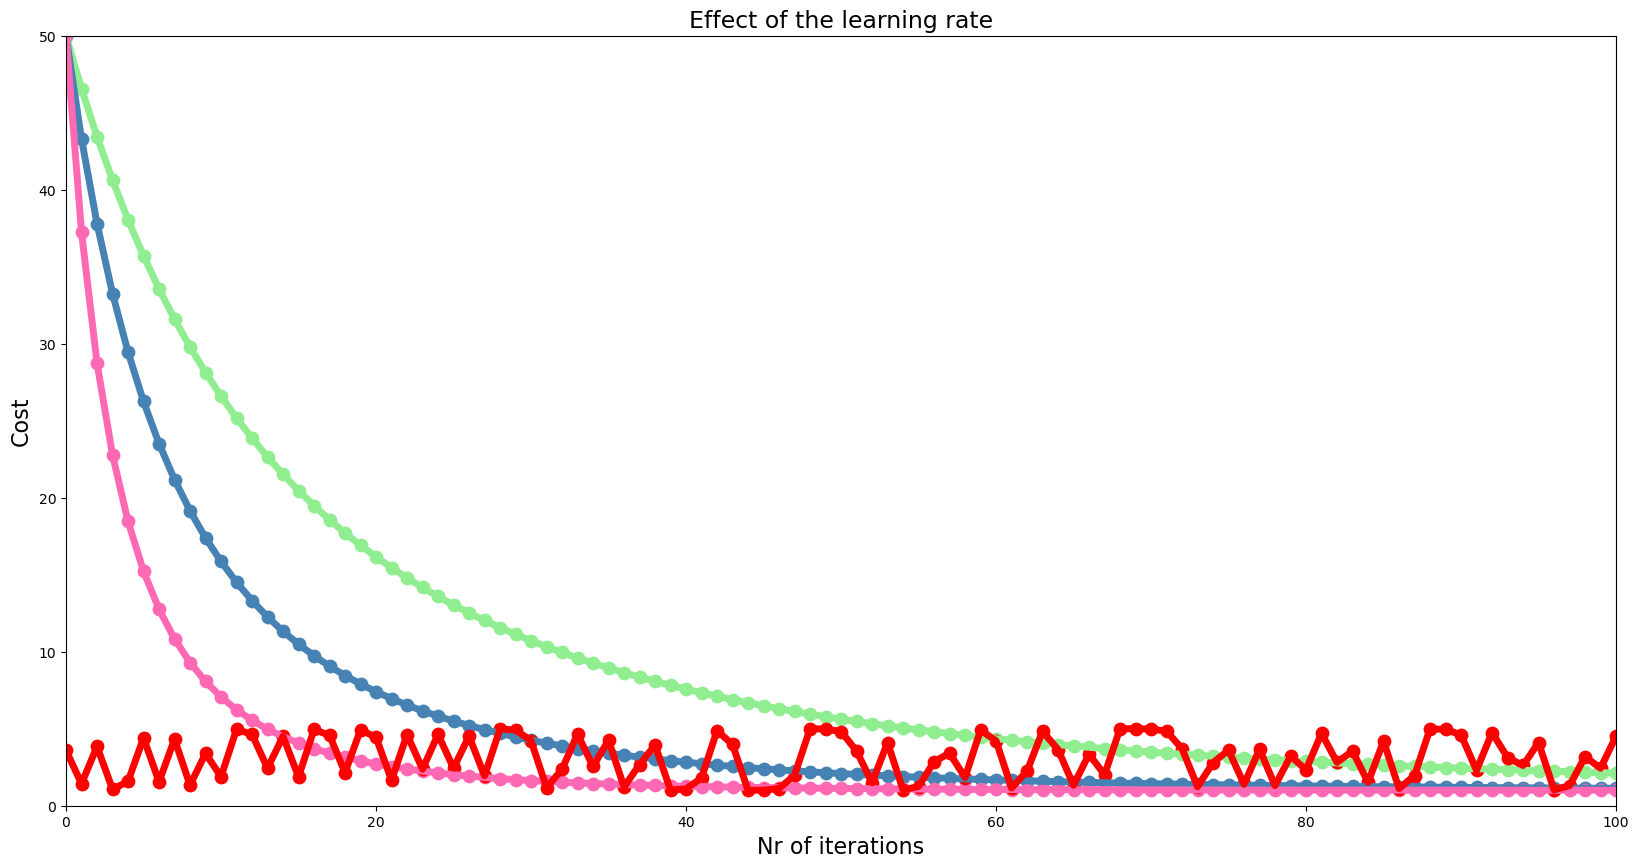

In [33]:
# This plot shows the decrease in cost with each iteration of the loop

n = 100
low_gamma = gradient_descent(derivative_func=dg,
                             initial_guess=3,
                             multiplier=0.0005,
                             max_iter=n,
                             precision=0.0001)

# Challenge: Plot two more learning rates: mid_gamma (0.001) and high_gamma(0.002)
mid_gamma = gradient_descent(derivative_func=dg,
                             initial_guess=3,
                             multiplier=0.001,
                             max_iter=n,
                             precision=0.0001)

high_gamma = gradient_descent(derivative_func=dg,
                             initial_guess=3,
                             multiplier=0.002,
                             max_iter=n,
                             precision=0.0001)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg,
                             initial_guess=1.9,
                             multiplier=0.25,
                             max_iter=n,
                             precision=0.0001)


# Plotting reduction in cost for each iteration
plt.figure(figsize=[20, 10])

plt.xlim(0,n)
plt.ylim(0,50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

#Adds scatter plot of gradiant descent algorithm results
#Must convert list to array before plugging into a function

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

# Plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

# Plotting insane learning rate
# Started at 1.9 so closer to the minimum but the learning rate does not get to the minimum
# This shows the algorithm bouncing around 
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)

plt.show()


# Example 4 - Data Viz with 3D Charts
The cost function will have 2 variables:
X and Y that would be optimized to minimize cost. 
## Minimize $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$
Minimize $$(x, y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2 - y^2}$

In [112]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return (1 / (r+1))

In [114]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)
# Shows 1 dimension, have to make it 2 dimension
# Turns 1 dimension vector to 2 dimension matrix
x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


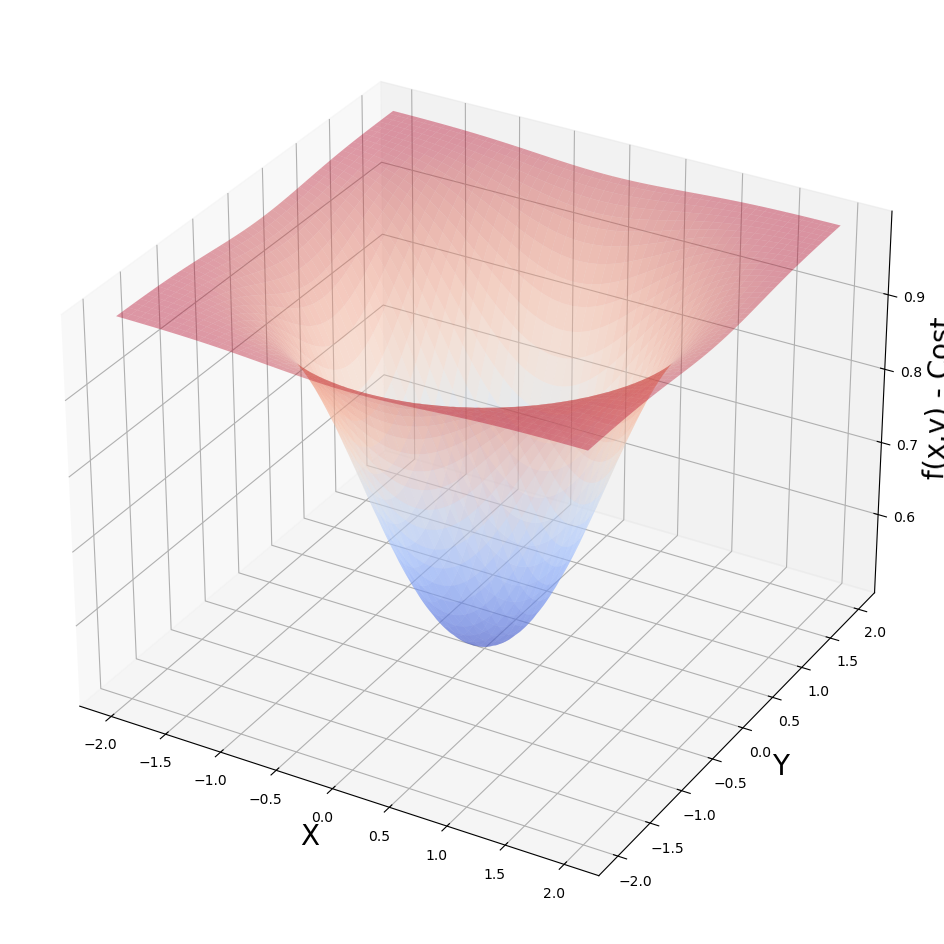

In [136]:
#from mpl_toolkits.mplot3d.axes3d import Axes3D
# Generating 3D Plot
fig = plt.figure(figsize=[16,12])
#Gets current axis 
# ax = fig.gca(projection='3d') Old version?
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)

# from matplotlib import cm -adds color cmap
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
# High cost = red, Low cost = blue
plt.show()

## Partial Derivatives & Symbolic Computation
## $$ \frac{\partial f}{\partial x} =  \frac {2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left (3^{-x^2 -y^2} + 1 \right)^2}$$

## $$ \frac{\partial f}{\partial y} =  \frac {2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left (3^{-x^2 -y^2} + 1 \right)^2}$$

In [ ]:
# from sympy import symbols, diff

In [162]:
# This says a=x and b=y
a, b = symbols('x, y')
print('Our cost function f(x,y) is, ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a,b), a))

Our cost function f(x,y) is,  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2


In [168]:
# How do we calculate cost at a particular point in our function.
# Evaluate function
print ('Value of f(x,y) at x=1.8 y=1.0 is: ',
       f(a,b).evalf(subs={a:1.8, b:1.0})) # Python dictionary

Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582


In [172]:
# Challenge: evaluate the value of the slope with respect to X at 1.8 and y. 
# Print out this value

print('Value of partial derivative wrt x: ', diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}))


Value of partial derivative wrt x:  0.0368089716197505


## Batch Gradient Descent with SymPy

In [183]:
# Setup
multiplier = 0.1
max_iter = 500
# Best data structure to work with if there are two or more values is a numpy array. 
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
## Challenge: create a variable called "gradient_y" and then complete the rest of the code. 
## It should calculate the slope in the y direction. 
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    # Combine both gradients into one np array. 
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x vlue of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ',  f(params[0],params[1]))
    

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x vlue of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [201]:
# Partial derivative functions example 4
# from math import log
def fpx(x,y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x,y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [203]:
### THIS IS FSATER THAN THE PREVIOUS SOLUTION
### SymPy might be slowing it down in gradient 
# Setup
multiplier = 0.1
max_iter = 500
# Best data structure to work with if there are two or more values is a numpy array. 
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    # Combine both gradients into one np array. 
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x vlue of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ',  f(params[0],params[1]))
    

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x vlue of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [292]:
# Continued modifications
# Setup
multiplier = 0.1
max_iter = 500
# Best data structure to work with if there are two or more values is a numpy array. 
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1,2) # changes the shape of the array
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    # Combine both gradients into one np array. 
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    # values_array = np.append(values_array, params.reshape(1,2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0)
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x vlue of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ',  f(params[0],params[1]))
    

(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x vlue of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


In [294]:
# Advance Numpy Array Practice: 
# Subsetting

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hsband[0]:', hs_band[0])
print('hsband[0][1]:', hs_band[1][0])

# Appends kirk array into the hs_band array as a row (axis=0)
# You can only append arrays that have the same shapes unless you reshape
the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

# Slicing arrays 
print('Printing nicknames...', the_roots[:,0]) # : means all rows, 0 means first column

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing roles...', the_roots[:,1])

(1, 2)
(2, 2)
hsband[0]: ['Black Thought' 'MC']
hsband[0][1]: Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing roles... ['MC' 'Drums' 'Guitar' 'MC']


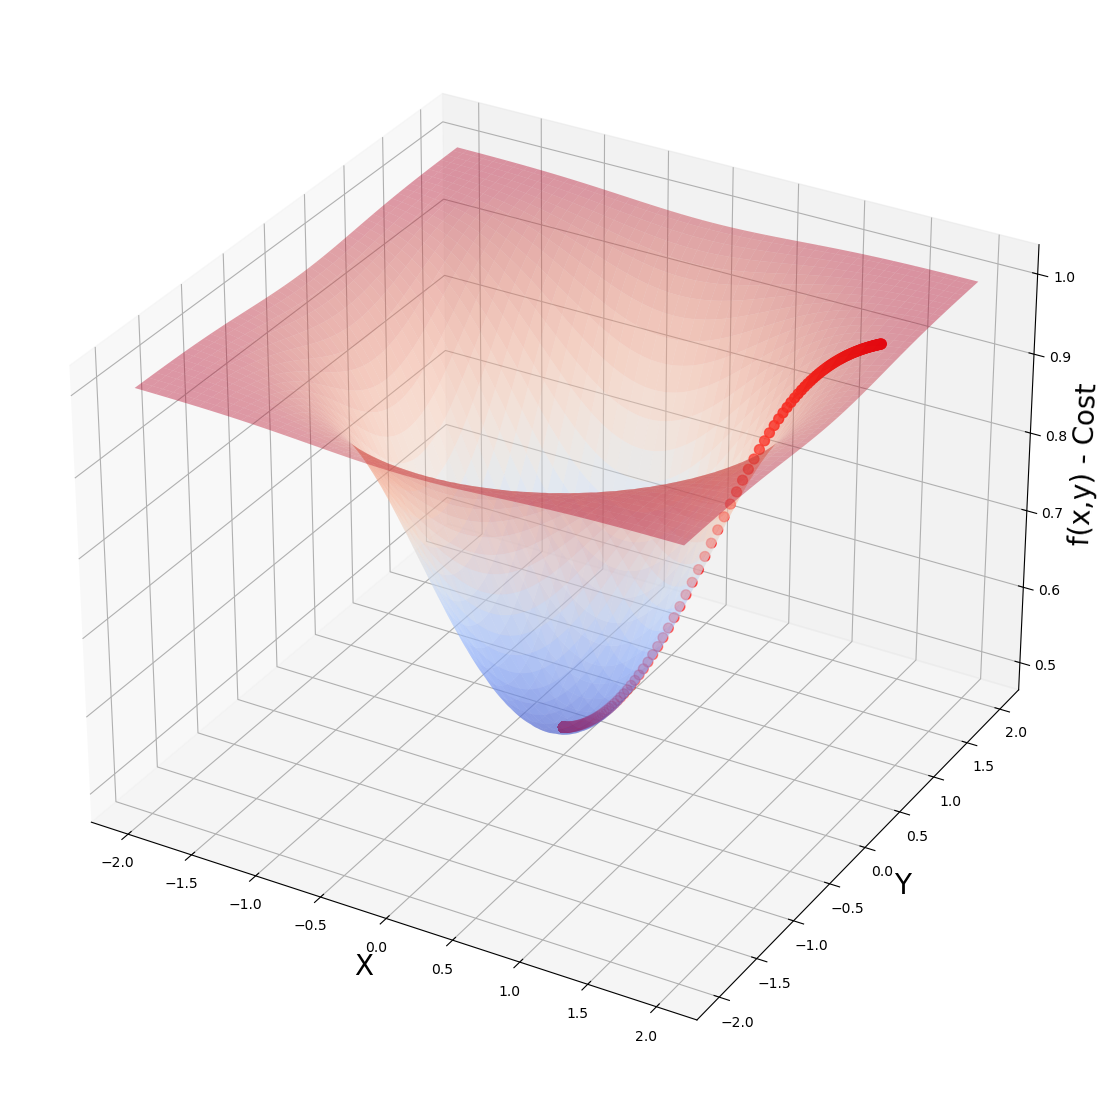

In [296]:
#from mpl_toolkits.mplot3d.axes3d import Axes3D
# Generating 3D Plot
fig = plt.figure(figsize=[16,14])
#Gets current axis 
# ax = fig.gca(projection='3d') Old version?
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)

# from matplotlib import cm -adds color cmap
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
# High cost = red, Low cost = blue

# Adds scatter plot
# inputs are x, y, and z axis 
ax.scatter(values_array[:,0], values_array[:,1], 
           f(values_array[:,0], values_array[:,1]), 
           s=50, color='red')

plt.show()

# Example 5 - Working with Data & a Real Cost Function
## Mean Squared Error: a cost function for regression problems
### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2$$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2$$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2$$

In [321]:
# Make sample data 
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose() # changed into 2 dimensional array
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1) # changed into 2 dimensional array


print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)


Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [325]:
# Quick linear regression
# from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])


Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


### Data Visualization

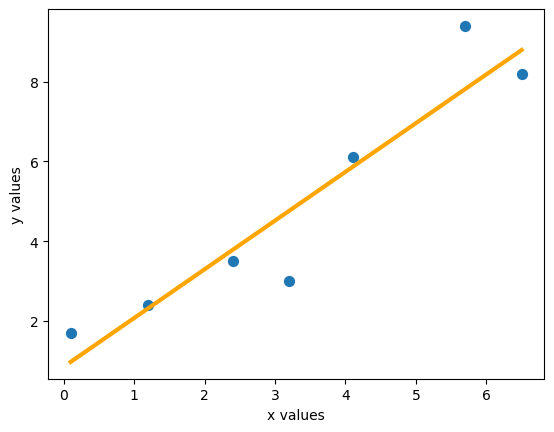

In [330]:
# Best fit line and data
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()
           

In [345]:
# y_hat = theta0 + theta1*x
y_hat = 0.8475351486029536 + 1.2227264637835915*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are: \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [359]:
# Challenge: 
# Write a python function mse(y, y_hat) that returns the MSE
# Call the mse(y, y_hat)
# print out the MSE for the y_hat calculated above

### THERE ARE 3 SOLUTIONS BASED ON THE COURSE

# Solution 1
def mse(y, y_hat):
    # mse_calc = 1/7 * sum((y-y_hat)**2)
    # mse_calc = (1/y.size) * sum((y-y_hat)**2)
    mse_calc = np.average((y-y_hat)**2, axis=0) #average of rows only
    return mse_calc

In [375]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
# from sklearn.metrics import mean_square_error 
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.9479655759794577
MSE regression is 0.9479655759794577


## 3D Plot for the MSE Cost Fucntion
### Make data for thetas

In [435]:
nr_thetas = 200
# Data points- 1 dimension only
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)

# Plotting a surface not a line so we need an array with 2 dimensions
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)



### Calc MSE using nested for loop

In [438]:
# create a 2D array with 0
# Input expected is a tuple
plot_cost = np.zeros((nr_thetas, nr_thetas)) # must be double parentheses

for i in range(nr_thetas):
    for j in range(nr_thetas):
        # print(plot_t0[i][j]) # goes through each row first
        # print(plot_t0[j][i]) # goes through each column first 
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat).item() #.item() solution to the following error:
        # Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future.
        # Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

        
print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [439]:
# Nested loop practice
for i in range (3):
    for j in range(3):
        print(f'value of i is {i} and j is {j}')
        
# Good for iterating through 2D arrays. 
# To go row by row and column by column. 

value of i is 0 and j is 0
value of i is 0 and j is 1
value of i is 0 and j is 2
value of i is 1 and j is 0
value of i is 1 and j is 1
value of i is 1 and j is 2
value of i is 2 and j is 0
value of i is 2 and j is 1
value of i is 2 and j is 2


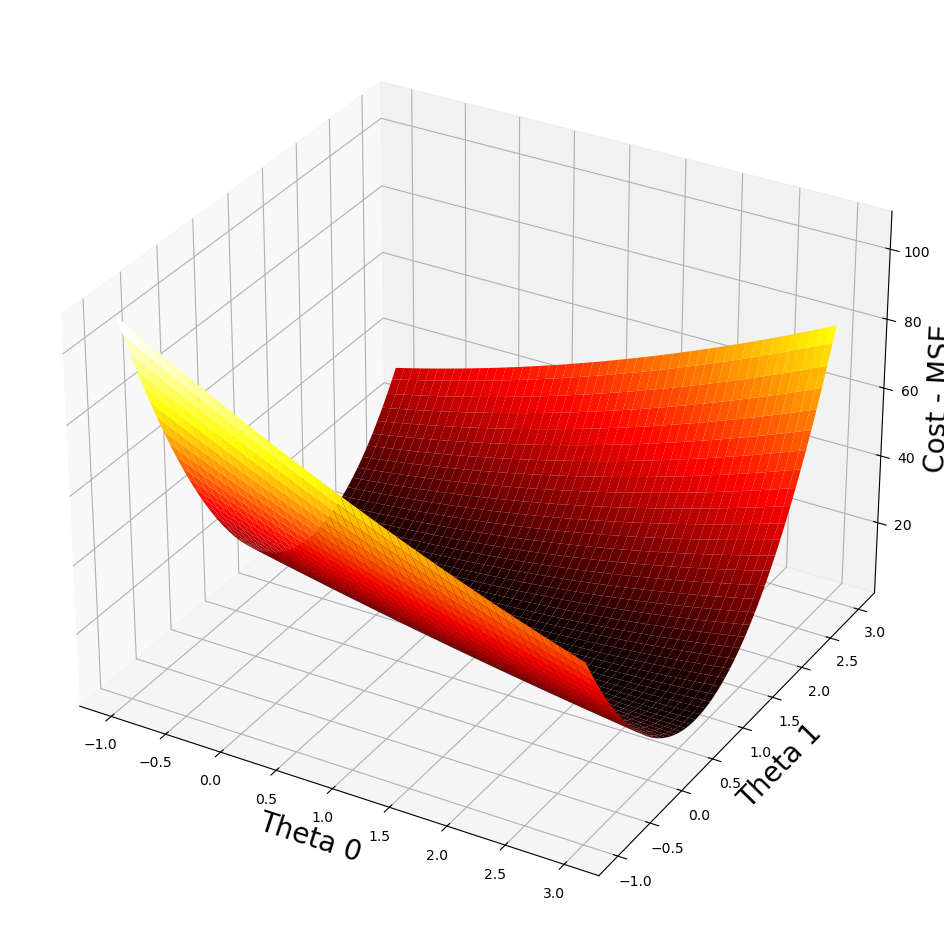

In [458]:
# Plotting MSE
fig = plt. figure(figsize=[16,12])
# ax = fig.gca(projection='3d') # No longer works
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [456]:
print('Min value of plot_cost', plot_cost.min())
# Outputs the indeces from our 2D array where the mean squared error is at its lowest. 
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Recall the following:
### Mean Squared Error (MSE)
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2$$
### Linear Regression
### $$ \hat{y} = \theta_{0} + \theta_{1}x$$

### Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$
### $$  = \frac{1}{n} \sum_{i=1}^{n} \big( y - (\theta_{0} + \theta_{1}x) \big)^2$$

### Simplified
### $$  = \frac{1}{n} \sum_{i=1}^{n} \big( y - \theta_{0} - \theta_{1}x \big)^2$$

### Partial Derivative after expansion
### $$ \frac{\partial MSE}{\partial \theta_{0}} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_{0} - \theta_{1}x^{(i)} \big)$$

### $$ \frac{\partial MSE}{\partial \theta_{1}} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_{0} - \theta_{1}x^{(i)} \big) \big(x^{(i)} \big)$$

## MSE & Gradient Descent

In [504]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    
    # Challenge: Create theta0_slop and theta1_slope to hold slop values from partial derivs
    theta0_slope = (-2/n) * sum(y- thetas[0] - thetas[1]*x) 
    theta1_slope = (-2/n) * sum((y- thetas[0] - thetas[1]*x)*x) 
    
    #Concatenating both arrays
    # return np.array([theta0_slope[0], theta1_slope[0]])
    # return np.apped(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)


In [513]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1,2)
## These 2 variables added
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to our numpy arrays
    # Taks the existing array of plot_vals, which is a 1 by 2 array, and it will
    # concatenate it with the new theta values
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0]+thetas[1]*x_5))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))
    
    

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


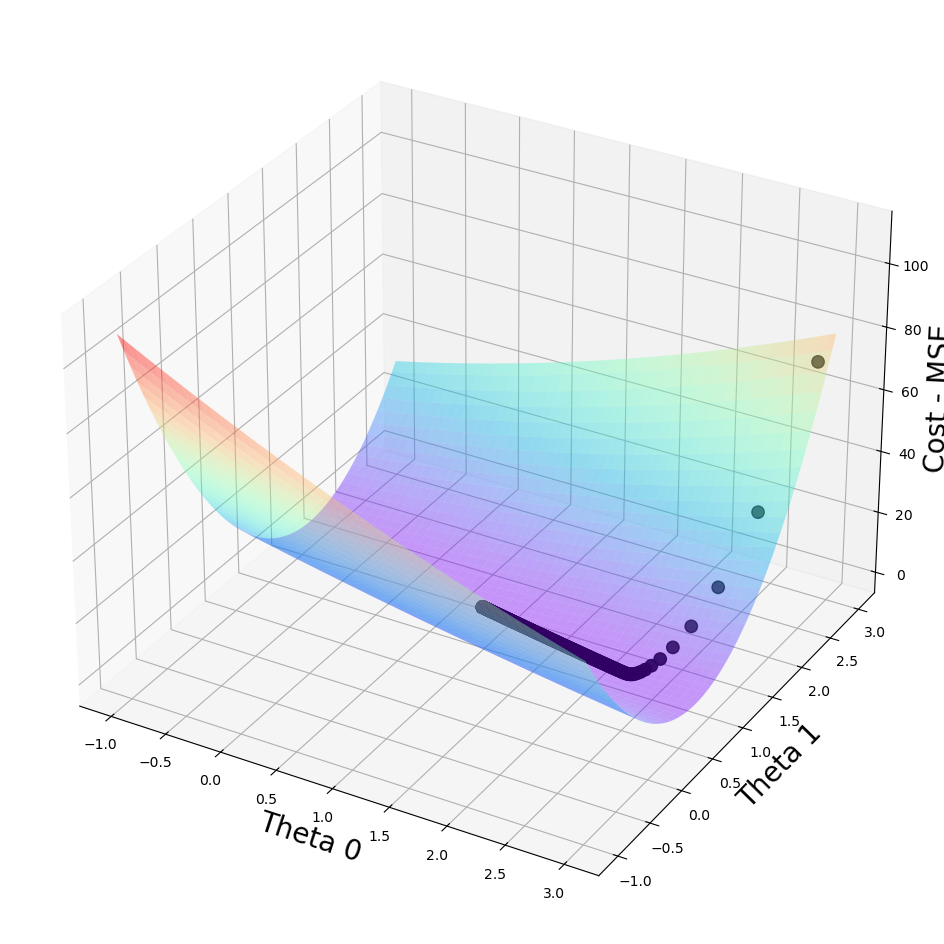

In [521]:
# Plotting MSE
fig = plt. figure(figsize=[16,12])
# ax = fig.gca(projection='3d') # No longer works
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

# Code added here: 
ax.scatter(plot_vals[:,0],plot_vals[:,1], mse_vals, s=80, color='black')

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()